In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
import matplotlib.image as image

In [185]:
image_array= image.imread('batman.jpg')

In [186]:
image_array.shape

(169, 269, 3)

In [187]:
r=[]
g=[]
b=[]

for row in image_array:
    for x,y,z in row:
        r.append(x)
        g.append(y)
        b.append(z)

In [189]:
image_df = pd.DataFrame({'Red':r, 'Green':g, 'Blue':b})

In [190]:

image_df.describe()

,Red,Green,Blue
count,45461.000000,45461.000000,45461.000000
mean,82.611051,75.164119,87.249225
std,79.972898,75.655537,89.314708
min,0.000000,0.000000,0.000000
25%,8.000000,5.000000,9.000000
50%,74.000000,65.000000,66.000000
75%,127.000000,149.000000,153.000000
max,248.000000,238.000000,255.000000


In [191]:
n_clusters = range(1,7)
cluster_dist=[]
for i in n_clusters:
    model = KMeans(n_clusters=i)
    model.fit(image_df)
    cluster_dist.append(model.inertia_)

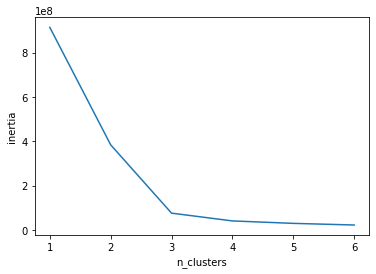

In [192]:
elbow_plot = pd.DataFrame({'n_clusters':n_clusters, 'inertia': cluster_dist})
sns.lineplot(x='n_clusters', y='inertia', data=elbow_plot);

In [194]:
model = KMeans(n_clusters=3)
model.fit(image_df)
cluster_labels = model.predict(image_df)
car_df['cluster_labels'] = cluster_labels

In [195]:
r_std, g_std, b_std = image_df[['Red','Green','Blue']].std()

In [196]:
colors=[]
for center in model.cluster_centers_:
    r , g, b = center
    colors.append((r*r_std//255,
                 g*g_std//255,
                 b*b_std//255))

In [197]:
colors = [(int(x),int(y),int(z)) for(x,y,z) in colors]

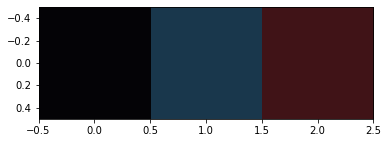

In [198]:
plt.imshow([colors]);

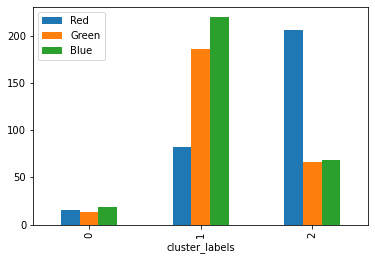

In [199]:
car_df.groupby('cluster_labels')[['Red','Green','Blue']].mean().plot(kind='bar');

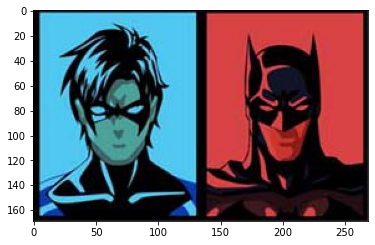

In [200]:
plt.imshow(car_array);